In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
from termcolor import colored

from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, f1_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve
from sklearn.model_selection import StratifiedKFold
from functools import partial
from hyperopt import hp
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
plt.rcParams['figure.figsize']=(12,4)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Failed to load cloudpickle, try installing cloudpickle via "pip install cloudpickle" for enhanced pickling support.


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 588D-4BF9

 Directory of C:\Users\benia

20.03.2020  06:44    <DIR>          .
20.03.2020  06:44    <DIR>          ..
18.02.2020  15:32    <DIR>          .anaconda
05.06.2019  12:58    <DIR>          .babun
19.03.2020  07:52             8˙743 .bash_history
26.02.2020  10:47    <DIR>          .conda
08.03.2020  11:47                42 .condarc
05.03.2020  09:16    <DIR>          .config
22.01.2020  11:05               252 .gitconfig
13.12.2019  18:59             1˙701 .git-credentials
05.06.2019  13:01    <DIR>          .ipython
17.02.2020  15:42    <DIR>          .jupyter
26.02.2020  12:08    <DIR>          .keras
28.12.2019  17:38    <DIR>          .matplotlib
05.06.2019  11:41    <DIR>          .PyCharmCE2019.1
10.12.2019  17:11    <DIR>          .vscode
11.03.2020  08:11    <DIR>          3D Objects
10.03.2020  16:24    <DIR>          Anaconda3
29.01.2020  08:30    <DIR>          ansel
11.03.2020  08:11    <DIR>          Cont

In [4]:
df = pd.read_hdf("adult.h5")

FileNotFoundError: File adult.h5 does not exist

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int8
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null bool
Capital Gain      32561 non-null int16
Capital Loss      32561 non-null int16
Hours per week    32561 non-null int8
Country           31978 non-null object
Target            32561 non-null object
dtypes: bool(1), int16(2), int64(2), int8(2), object(8)
memory usage: 2.9+ MB


In [6]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K


In [8]:
df.columns.values

array(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country',
       'Target'], dtype=object)

Race              1
Education         1
Martial Status    1
Age               1
Country           1
Sex               1
Occupation        1
Relationship      1
Workclass         1
Capital Loss      1
Capital Gain      1
Education-Num     1
Target            1
fnlwgt            1
Hours per week    1
dtype: int64

In [7]:
pd.set_option('display.max_colwidth', -1)


C:\Users\benia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [18]:
df.columns


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [20]:
df.sample(15)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
17596,55,Private,226875,HS-grad,9,Married-civ-spouse,Sales,Husband,White,True,4064,0,40,United-States,<=50K
25415,36,Private,126954,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,True,0,0,40,United-States,<=50K
23260,37,Private,178948,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,False,7688,0,45,United-States,>50K
25975,42,Private,297335,Assoc-acdm,12,Married-spouse-absent,Exec-managerial,Unmarried,Asian-Pac-Islander,False,0,0,31,Laos,<=50K
19635,37,Private,167415,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,True,0,0,60,United-States,>50K
19722,38,Local-gov,86643,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,True,0,0,45,United-States,>50K
3707,41,Private,113555,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,True,7298,0,50,United-States,>50K
11434,46,Private,247043,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,True,0,0,40,United-States,>50K
22191,27,Private,38606,Bachelors,13,Never-married,Sales,Not-in-family,White,True,0,1504,45,United-States,<=50K
27024,61,Private,280088,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,False,0,0,40,United-States,<=50K


In [8]:
if 'fnlwgt' in df: del df['fnlwgt']

In [22]:
df.head()

,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K


In [23]:
df.shape

(32561, 14)

In [148]:
for column in df.columns:
    print(colored("Unique value: {0}".format(column),'blue',attrs=['bold','blink','underline']))
    print(df[column].unique())

Unique value: Age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Unique value: Workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique value: Education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unique value: Education-Num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique value: Martial Status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unique value: Occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Te

In [166]:
for repet in df.columns:
    print (colored("\nRecurring values: {0}\n".format(repet),'green',attrs=['bold','blink','underline']))
    print(df[repet].value_counts())


Recurring values: Age

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
51    595
49    577
18    550
48    543
52    478
53    464
55    419
54    415
17    395
58    366
56    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: Age, dtype: int64

Recurring values: Workclass

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-work

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
Age               32561 non-null int8
Workclass         30725 non-null object
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null bool
Capital Gain      32561 non-null int16
Capital Loss      32561 non-null int16
Hours per week    32561 non-null int8
Country           31978 non-null object
Target            32561 non-null object
dtypes: bool(1), int16(2), int64(1), int8(2), object(8)
memory usage: 2.7+ MB


In [10]:
df['Education-Num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int8)

In [11]:
df['Education-Num'] = df['Education-Num'].astype('int8')

In [15]:
df['Education-Num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int8)

In [216]:
df[ df['Workclass'].isnull() ].shape

(1836, 16)

In [179]:
df['Sex_cat'] = df['Sex'].astype(np.int8)

In [16]:
df['Target_cat'] = df['Target'].map(lambda x: int(x == '<=50K') )  

In [206]:
df.head(10)

,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Sex_cat,Target_cat
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K,1,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K,1,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K,1,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K,1,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K,0,1
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,False,0,0,40,United-States,<=50K,0,1
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,False,0,0,16,Jamaica,<=50K,0,1
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,45,United-States,>50K,1,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,False,14084,0,50,United-States,>50K,0,0
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,5178,0,40,United-States,>50K,1,0


In [207]:
df.corr()

,Age,Education-Num,Sex,Capital Gain,Capital Loss,Hours per week,Sex_cat,Target_cat
Age,1.000000,0.036527,0.088832,0.064301,0.057775,0.068756,0.088832,-0.234037
Education-Num,0.036527,1.000000,0.012280,0.062300,0.079923,0.148123,0.012280,-0.335154
Sex,0.088832,0.012280,1.000000,0.028219,0.045567,0.229309,1.000000,-0.215980
Capital Gain,0.064301,0.062300,0.028219,1.000000,-0.027282,0.031964,0.028219,-0.154853
Capital Loss,0.057775,0.079923,0.045567,-0.027282,1.000000,0.054256,0.045567,-0.150526
Hours per week,0.068756,0.148123,0.229309,0.031964,0.054256,1.000000,0.229309,-0.229689
Sex_cat,0.088832,0.012280,1.000000,0.028219,0.045567,0.229309,1.000000,-0.215980
Target_cat,-0.234037,-0.335154,-0.215980,-0.154853,-0.150526,-0.229689,-0.215980,1.000000


In [17]:
df.fillna(-1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int8  
 1   Workclass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education-Num   32561 non-null  int8  
 4   Martial Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Race            32561 non-null  object
 8   Sex             32561 non-null  bool  
 9   Capital Gain    32561 non-null  int16 
 10  Capital Loss    32561 non-null  int16 
 11  Hours per week  32561 non-null  int8  
 12  Country         32561 non-null  object
 13  Target          32561 non-null  object
 14  Target_cat      32561 non-null  int64 
dtypes: bool(1), int16(2), int64(1), int8(3), object(8)
memory usage: 2.7+ MB


,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Sex_cat,Target_cat
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K,1,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K,1,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K,1,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K,1,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K,0,1


In [18]:
cat_feats = df.select_dtypes(include=[np.object]).columns

In [19]:
cat_feats

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Country', 'Target'],
      dtype='object')

In [20]:
for feats in cat_feats:
     df["{}_cat".format(feats)] =pd.factorize(df[feats])[0]

In [226]:
df.head()

,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,...,Target,Sex_cat,Target_cat,Workclass_cat,Education_cat,Martial Status_cat,Occupation_cat,Relationship_cat,Race_cat,Country_cat
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,...,<=50K,1,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,...,<=50K,1,0,1,0,1,1,1,0,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,...,<=50K,1,0,2,1,2,2,0,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,...,<=50K,1,0,2,2,1,2,1,1,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,...,<=50K,0,0,2,0,1,3,2,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 32561 non-null  int8  
 1   Workclass           30725 non-null  object
 2   Education           32561 non-null  object
 3   Education-Num       32561 non-null  int8  
 4   Martial Status      32561 non-null  object
 5   Occupation          30718 non-null  object
 6   Relationship        32561 non-null  object
 7   Race                32561 non-null  object
 8   Sex                 32561 non-null  bool  
 9   Capital Gain        32561 non-null  int16 
 10  Capital Loss        32561 non-null  int16 
 11  Hours per week      32561 non-null  int8  
 12  Country             31978 non-null  object
 13  Target              32561 non-null  object
 14  Target_cat          32561 non-null  int64 
 15  Workclass_cat       32561 non-null  int64 
 16  Education_cat       32

In [24]:
[x for x in df.columns if "_cat" in x]

['Target_cat',
 'Workclass_cat',
 'Education_cat',
 'Martial Status_cat',
 'Occupation_cat',
 'Relationship_cat',
 'Race_cat',
 'Country_cat']

# Basic model and feats preparation

In [128]:
feats=[  
         'Target_cat',
         "Age",
         "Education-Num",
         "Capital Gain",
         "Capital Loss",
         "Hours per week",
         'Workclass_cat',
         'Education_cat',
         'Martial Status_cat',
         'Occupation_cat',
         'Relationship_cat',
         'Race_cat',
         'Country_cat'
      ]

C:\Users\benia\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\benia\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


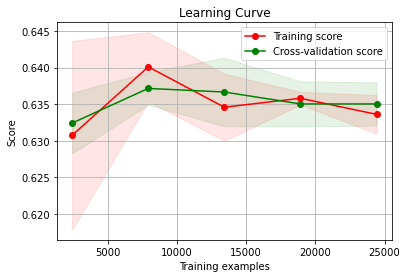

In [129]:
X = df[feats].values
y= df["Target_cat"].values

model = DummyClassifier()
model.fit(X,y)
y_pred = model.predict(X)
accuracy_score(y_pred,y)
plot_learning_curve(model, X, y, cv=4, random_state=20)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Created model Regressor 

In [361]:
def train_model(model,type1):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if type1=='r': 
        plot_learning_curve(model, X, y, cv=4, random_state=20, shuffle=True)
    if type1=='c': 
        plot_learning_curve(model, X, y, cv=4, random_state=20, scoring='f1')
        
    print(r2_score(y_test, y_pred))


1.0


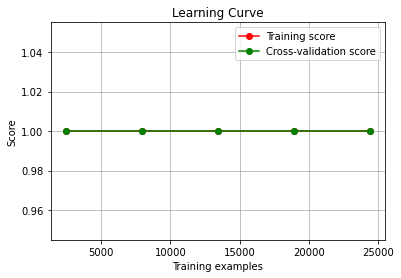

In [74]:
model_DecisionTreeRegressor = train_model(DecisionTreeRegressor(random_state=20, max_depth=5),'r')

1.0


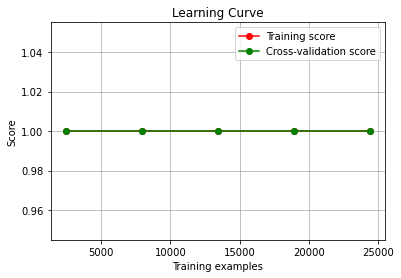

In [76]:
model_RandomForestRegressor = train_model(RandomForestRegressor(random_state=20, n_estimators=50, max_depth=5),'r')

0.9999999998764286


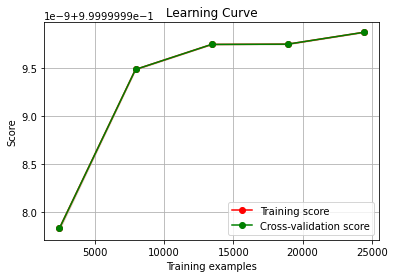

In [77]:
model_XGBRegresor = train_model(xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=50, random_state=20),'r')

0.9999734372916962


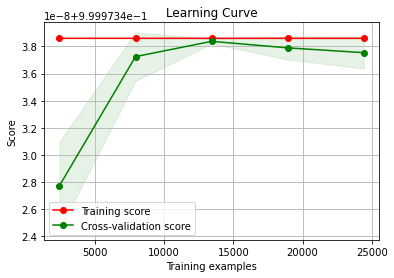

In [78]:
model_LGBMRegressor = train_model(lgb.LGBMRegressor(n_estimators=50, random_state=20, max_depth=4),'r')

0.9999829044904606


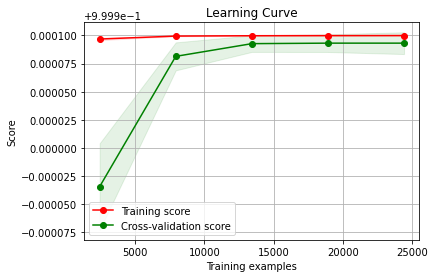

In [90]:
model_CatBoostRegressor = train_model(ctb.CatBoostRegressor(n_estimators=50, depth=6, random_state=20, verbose=False),'r')

# Created model Classifier

1.0


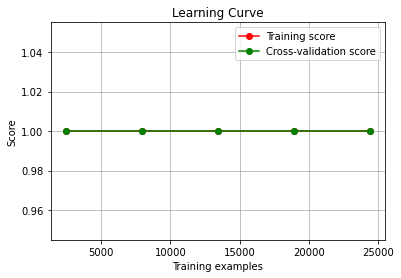

In [89]:
model_DecisionTreeClassifier= train_model(DecisionTreeClassifier(random_state=20, max_depth=5),'c')

1.0


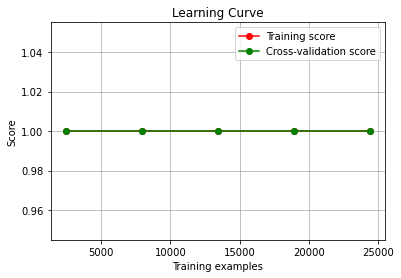

In [88]:
model_RandomForestClassifier = train_model(RandomForestClassifier(random_state=20, n_estimators=50 ,max_depth=5),'c')

1.0


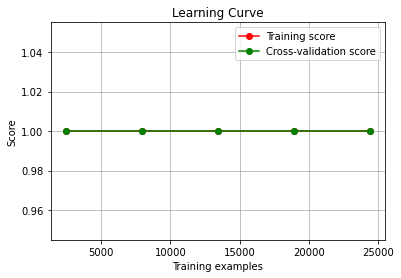

In [362]:
model_XGBoostClassifier = train_model(xgb.XGBClassifier(random_state=20, n_estimators=50),'c')

1.0


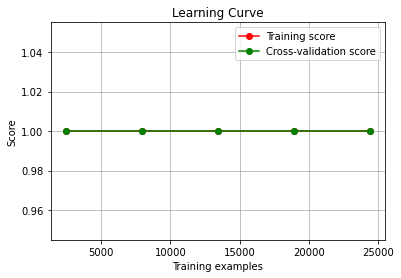

In [132]:
model_LGBMClassifier = train_model(lgb.LGBMClassifier(n_estimators=50, random_state=20),'c')

1.0


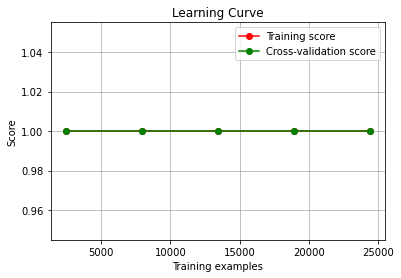

In [288]:
model_CatBoostClassifier = train_model(ctb.CatBoostClassifier(n_estimators=50, depth=5, verbose=False, random_state=20),'c')

In [372]:
print(y_pred[-1], X_test[-1])

0 [   1   60   14 3103    0   40    0    3    1    1    2    0    0]


In [371]:
X_test

array([[ 0, 69,  7, ...,  0,  0,  0],
       [ 0, 19,  9, ...,  3,  0,  0],
       [ 0, 49,  9, ...,  1,  0,  0],
       ...,
       [ 0, 20, 10, ...,  0,  0,  0],
       [ 0, 30,  9, ...,  1,  0,  0],
       [ 1, 60, 14, ...,  2,  0,  0]], dtype=int64)

In [379]:
def objective(space):
    
    xgb_params = {
        'max_depth': int(space['max_depth']),
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'random_state': int(space['random_state']),
        'min_child_weight': int(space['min_child_weight']),
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'n_estimators': 100,
        'objective': 'reg:squarederror'
    }
    
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = mean_squared_error(y_test, y_pred)
    
    print("SCORE: {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('x_max_depth', 5, 20, 1),
    'colsample_bytree': hp.uniform ('x_colsample_bytree', 0.8, 1.),
    'learning_rate': hp.uniform ('x_learning_rate', 0.05, 0.2),
    'subsample': hp.uniform ('x_subsample', 0.7, 1.),
    'random_state': hp.quniform ('x_random_state', 0, 10000, 50),
    'min_child_weight': hp.quniform ('x_min_child_weight', 1, 10, 1),
    'reg_alpha': hp.loguniform ('x_reg_alpha', 0., 1.),
    'reg_lambda': hp.uniform ('x_reg_lambda', 0.7, 1.),
}


trials = Trials()
best_params = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=1),
            max_evals=100,
            trials=trials)

print("The best params: ", best_params)

SCORE: 8.842310910424845e-05                                                                                           
SCORE: 6.086018993745757e-05                                                                                           
SCORE: 0.00021220589479566544                                                                                          
SCORE: 3.46626034126355e-07                                                                                            
SCORE: 0.0001885470345519968                                                                                           
SCORE: 0.00014762891754964796                                                                                          
SCORE: 3.29588118425142e-08                                                                                            
SCORE: 2.918638019546796e-06                                                                                           
SCORE: 0.0002000901184194882            

In [380]:
trials.best_trial

{'state': 2,
 'tid': 6,
 'spec': None,
 'result': {'loss': 3.29588118425142e-08, 'status': 'ok'},
 'misc': {'tid': 6,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'x_colsample_bytree': [6],
   'x_learning_rate': [6],
   'x_max_depth': [6],
   'x_min_child_weight': [6],
   'x_random_state': [6],
   'x_reg_alpha': [6],
   'x_reg_lambda': [6],
   'x_subsample': [6]},
  'vals': {'x_colsample_bytree': [0.945279885400579],
   'x_learning_rate': [0.15483940184870992],
   'x_max_depth': [16.0],
   'x_min_child_weight': [2.0],
   'x_random_state': [6650.0],
   'x_reg_alpha': [1.1763621300096845],
   'x_reg_lambda': [0.9097780305148938],
   'x_subsample': [0.7917337450403731]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2020, 3, 9, 17, 27, 47, 498000),
 'refresh_time': datetime.datetime(2020, 3, 9, 17, 27, 48, 969000)}